# 2.2 

Determinants of Portfolio Performance ( 포트폴리오 성과 결정 요인)

---
https://sci-hub.st/10.2469/faj.v51.n1.1869


1974년에서 1983년까지의 91개 미국 대형연기금 데이터를 분석한 결과에 따르면, 자산배분이 투자전략(마켓 타이밍과 종목선택)보다 중요하며 총수익률 변동성의 95.6%를 설명한다.

---
자산배분이란 위험수준이 다양한 여러 자산집단을 대상으로 투자자금을 배분하여 포트포리오를 구성하는 투자과정입니다.

자산집단이란 주식,채권 같은 넓은 의미의 자산 중에서
위험과 기대 수익률이 상이한 세부집단으로 재분류한 것이다.

#전략적 자산배분
전략적 자산배분은 장기적인 자산배분계획입니다.


투자 목적을 달성하기 위해 장기적인 포트폴리오의 자산구성을 정하는 의사결정입니다.


장기적인 자산구성 비율과 연간 혹은 반기 단위의 중기적으로 각 자산집단의 변동할 수 있는 투자 비율의 폭을 결정하는 의사결정입니다.

---
#전술적 자산배분
전술적 자삽배분은 단기, 중기적인 자산배분계획입니다.
시장의 변화 방향을 예상해 사전적으로 자산 구성을 변동시켜 나가는 전략입니다.
저평가된 자산을 매수하고, 고평가된 자산을 매도함으로써
투자 성과를 높이고자 하는 전략입니다.


즉, 전략적 자산배분의 수립 시점에서 세웠던 자본시장에 관한 각종 가정들이 변화함으로써 자산집단들의 상대적 가치가 변화하는 경우, 이러한 가치변화로부터 투자 이익을 획득하기 위해 분기나 월간 단위로 자산구성을 변경하는 적극적인 투자전략이다.

---
#2.3 샤프비율
Wiluam Sharpe 가 개발한 투자성과 판단용 지수입니다.
우리가 손실을 무릎쓰고 펀드에 투자를 하는 것은 은행 이자보다 

높은 수익률을 위해서입니다.

보통 샤프지수가 1이면 그럭저럭 정도로 해석할 수 있지만, 주식 상품의 경우 초과수익률에 계산에 국공채 수익률을 사용하기에 괜찮은 성적을 내지만 샤프지수는 1에 미치지 못하는 경우가 많다.

https://news.kbs.co.kr/news/view.do?ncd=4209876


위 기사 내용을 보면 국민연금의 샤프지수는 세계적으로 유명한 주식 대가 워런 버핏과 조지 소로스의 포트폴리오에 비해 오히려 높은 수준임을 알 수 있다.

국민연금이 안정적인 수익률을 얻는 것은 사실이지만 
더 높은 수익률을 얻을 기회를 잡지 않고 안전하게 선택하는 투자이기 떄문이다.

국민연금 특성상 국민의 돈을 가지고 투자를 해야하기 떄문에 어쩔 수 없는 Low -Risk 투자 방식이라고 할 수 있다.










## 5장. Black Litterman Model의 개요


---
Markowitz의 평균분산최적화모델(Mean Variance Optimization Model)의 한계 극복

Black-Litterman 모델은 시장균형수익률을 기대수익률로 활용한다.

시장균형수익률은 시장중립적포트폴리오(Market neutral portfolio)에서 도출하여 Markowitz의 일반적 평균분산최적화모델과 달리 자산배분의 기준수준을 제시한다는 것이 큰 차이가 될 수 있다.

시장중립적 수익률과 자산배분이라는 기준선에 투자자의 **주관적 견해(View)**를 추가적으로 적용하여 최종적인 균형수익률과 자산배분을 도출

**따라서, MVO모델과는 달리 모든 자산군에 자산이 배분되는 안정적인 포트폴리오 완성**

---










포트폴리오 구성과 관련된 모델 중 가장 잘 알려진 이론은 **Mean-Variance Optimization Portfolio**

해당 모델의 로직은 논리적이고 직관적이지만, 몇 가지 문제점들이 있습니다.



In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 최적화 라이브러리를 임포트한다
from scipy.optimize import minimize
import numpy as np

import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl 

tickers = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = fdr.DataReader(t, data_source='yahoo',start='01-01-2019', end='31-12-2019')['Close']

In [ ]:
ret_daily = pxclose.pct_change()
ret_annual = ret_daily.mean() * 250
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

In [ ]:

ret_daily.head()

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099544,-0.01519,-0.025338,0.001292,-0.031441
2019-01-04,0.042475,0.03856,0.050127,0.021136,0.057766
2019-01-07,-0.002159,0.02599,0.034404,0.061937,0.054297
2019-01-08,0.019200,0.00965,0.016568,-0.020533,0.001194


In [ ]:

print(cov_annual.head())

          AAPL         F      AMZN        GE      TSLA
AAPL  0.068239  0.019760  0.035366  0.032321  0.042385
F     0.019760  0.074303  0.021014  0.039463  0.016100
AMZN  0.035366  0.021014  0.051767  0.030618  0.032714
GE    0.032321  0.039463  0.030618  0.161464  0.047034
TSLA  0.042385  0.016100  0.032714  0.047034  0.237486


In [ ]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

In [ ]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

In [ ]:
covmat=cov_daily*250
weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
print(res)

     fun: 0.19382069030017746
     jac: array([0.19347709, 0.19425711, 0.19366093, 0.19374546, 0.19392019])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.20729983, 0.31207228, 0.41853927, 0.0244816 , 0.03760701])


In [ ]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))   
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

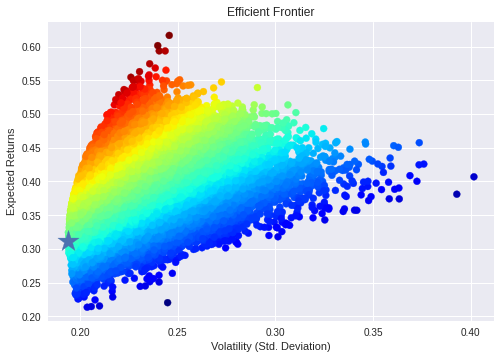

In [ ]:
rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

#문제점
---

1.   입력 데이터의 작은 변화에도 도출되는 포트폴리오 구성비중이 크게 변합니다.

2.   몇 개의 자산에 비중이 쏠리는 코너 솔루션이 나타나는 경우가 있습니다.

3.  투자자가 가지고 있는 정보를 녹여낼 수 있는 방법이 없습니다. 

    따라서, 시장에 대한 견해가 다른 매니저일지라도 (같은 hyperparameter를 가지고 있는 경우) 같은 MVO 포트폴리오를 얻게 됩니다. 

---
= 골드만삭스의 Fisher Black과 Robert Litterman이 1990년에 개발하고 

=1992에 발표한 포트폴리오 최적화 방법론이 Black-Litterman Model


Black - Litterman 모델은 베이지언(Bayesian)개념을 사용하고 있는데 MVO모델과는 달리 기대수익률을 확정된 수치가 아닌 확률변수로 취급

CAPM(Capital Asset Pricing Model)수익률의 확률분포를 베이지언의 사전분포(prior distribution)로 사용

이와 같은 사전분포에 투자자의 개별 자산군의 수익률에 대한 의견을 추가하여 최종적으로 기대수익률의 분포가 만들어진다.


**# 5.2 사전확률과 사후확률**

 베이지안 추론은 새로운 증거를 통해 우리의 믿음을 업데이트하는 것

 기존의 믿음의 양과 업데이트된 믿음의 양이 필요하다. (물론 증거도 있어야 한다.) 

 기존의 믿음의 양을 사전확률이라 하고 업데이트된 믿음의 양을 사후확률이라 한다

** 초반의 디버깅 문제를 예시**

사전확률은 현재 내 코드에 버그가 있을 것 같다는 나의 믿음의 양이다. 이후 세 가지의 테스트 코드를 모두 통과했다는 것을 확인하였다.

(증거) 사후확률은 아직 버그가 있을 순 있지만, 지금 당장 버그가 있을 거 같진 않다라는 나의 믿음의 양이다.

우리가 더 많은 증거를 얻을수록, 우리의 사전 믿음이 새로운 증거에 의해 희석된다는 점이다. 예로 우리가 가진 증거의 개수가 N이라고 해보자.

 N → 
∞
 라고 말할 정도로 증거를 많이 모았다면 베이지안의 결과는 종종 빈도주의자의 결과와 일치할 것이다. 
 
 그러므로 N이 커질수록 통계적 추론은 어느정도 객관적이다.

사건의 사전적인 불확실성을 도입하는 것은 우리의 추측이 잠재적으로 틀리다는 걸 인정하는 것이다. 데이터, 증거, 기타 정보를 관찰한 후 믿음을 업데이트하면 추측은 덜 틀리게 될 것이다.






In [ ]:

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic') # plot에 한글을 출력하기 위해서 필요하다
colors = ['#348ABD', "#A60628"]

In [ ]:
prior = [1/2., 1/2.]  # 사전확률 : [P(A), P(~A)] #처음 노란상자와 파란상자를 뽑을 확률
posterior = [0.375,1-0.375]  #노란상자를 뽑고 검은공4개중 1개를 뽑을 확률과 파란상자를 뽑고 검은공4개중 2개를 뽑을 확률

#파란상자와 노란상자에 검은색공이 있을 확률은 1/2이라고 한다면 어느 곳을 고르던 검은색 공을 발견할수 있다.
#이와 같은 오류를 해결하기 위해서 베이지안 추론 적용!
#검은색 공이 노란상자에 있을 확률을 A라고 한다. , P(A) = 1/2 사전확률이다.
#이제 검은공 상자의 정보를 얻었다면 이를 X라고 부른다
#여기서 알고 싶은 확률은 검은색공의 정보를 안다는 가정에서 검은색공이 노란색 상자에 있을 확률인 P(A | X)이다.


<BarContainer object of 2 artists>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


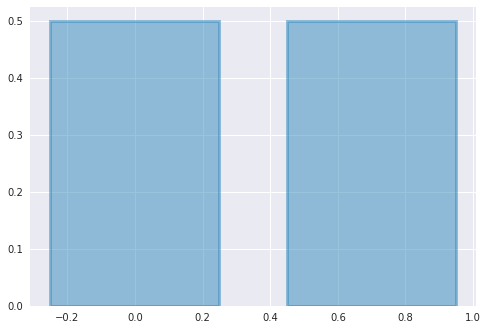

In [ ]:
plt.bar([0, .7], prior, alpha=0.5, width=0.5,
        color=colors[0], label="사전확률", 
        lw="3", edgecolor='#348ABD')

<BarContainer object of 2 artists>

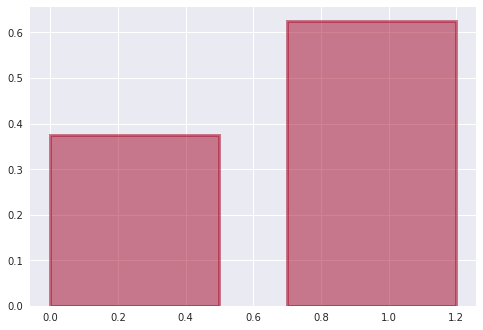

In [ ]:
plt.bar([0+0.25, .7+0.25], posterior, alpha=0.5, 
        width=0.5, color=colors[1], label='사후확률', 
        lw="3", edgecolor='#A60628')

# . Introduction (Black - Litterman)모델


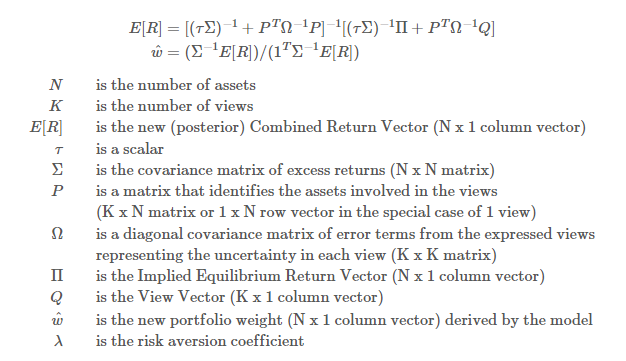

수식이 엄청 복잡 ,

**시장 데이터를 통해 도출된 “적당한” 수익률(화면 캡처 2022-07-19 224809.png)과 투자자의 전망(Q)을 “잘” 조합하여 새로운 기대수익률(E|[R])을 만드는 과정**

---
화면 캡처 2022-07-19 225011.png

도출된 기대수익률을 사용하여 새로운 포트폴리오 비중( 화면 캡처 2022-07-19 225110.png ) 을 구하는 것이, 모델 최종 목표

---






#5.1 균형기대수익률 ( 화면 캡처 2022-07-19 224809.png  )

투자수익률과 위험을 기초로 효율적인 자산배분을 찾던 방식과 반대로 균형 있게 배분된 이미 알려진 정보의 투자자산에서 균형기대수익률(Implied Equilbrium Return) 또는 내재초과균형수익률을 구하는데, 이를 **역최적화(Reverse Optimization)** 

'초과'란 무위험수익률을 초과하는 것을 말함, 

---
블랙- 리터만 모델에서는 위험 회피계수와 투자자산들의 수익률 상관계수, 균형 배분된 시가총액 비중을 통해 균형기대수익률을 구함

**균형기대수익률이란 시장에 내재된 자산의 균형기대수익률을 의미하며, 여기에 투자자의 분석을 더하는 형태.**

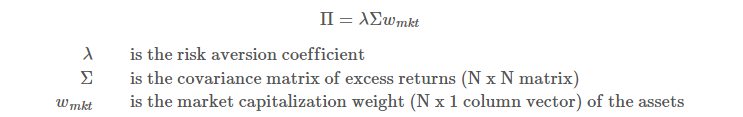

화면 캡처 2022-07-19 224809.png : 균형기대수익률(n x 1벡터)

화면 캡처 2022-07-19 235748.png : 투자자의 위험회피계수(스칼라 상수)

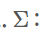 : 과거 수익률의 공분산 행렬(n x n 행렬 )

W_mkt : 자산시가총액 비중(n x 1 벡터)

n : 자산의 수

# 5.2 위험회피계수 (화면 캡처 2022-07-19 235748.png )

위험회피계수는 투자자의 위험에 대한 태도

포트폴리오의 위험 대비 수익률을 수치화한 계수

위험회피계수가 클수록 무위험자산 투자 비중이 높아지고,

위험자산 투자 비중은 낮아진다.

위험회피계수는 초과수익률을 수익률의 분산으로 나눈 것이다.

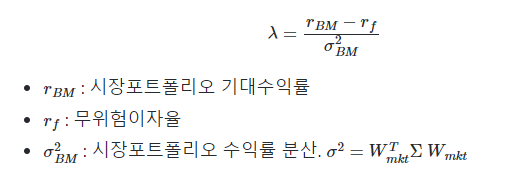
(시가총액가중 포트폴리오의 평균 초과수익률 / 분산)

#5.3 자산의 공분산행렬 (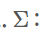 )

자산의 공분산 행렬은 각 자산의 무위험수익률(또는 이자율)을 초과하는 수익률 간의 공분산을 계산한다.

자산의 공분산 행렬 = COV(자산수익률 - 무위험이자율)

공분산(covariance)란 두 변수가 함께 변화하는 정도를 나타내는 지표

# 5.4 자산시가총액의 비중( W_mkt)

자산시가총액 비중은 시장 전체의 시가총액 중 각 자산이 차지하는 시가총액의 비중을 의미

자산시가총액 비중 = 자산 시가총액 / 시장 시가총액 합계

비중은 전체 합으로 나누는 분수 계산.

# 5.4.1 시가총액

한마디로 회사의 총가치라고 표현할 수 있다. 시가총액을 활용하여 쉽게 회사의 규모를 알 수 있고 다른 회사와 비교할 때 유용하게 사용가능

---
시가총액 = 주가 X 총 발행 주식수
---
주가 2만원 ,총 발행 주식수 1000주인 회사 - 2만원 x 1000주 = 시가총액 2000만원

---
투자자가 알고 있어야하는 시가총액의 뜻
---
**1. 시가총액이 클수록 기업의 가치가 높다.**

만약 항공관련사업이 유망할것으로 예상하고 관련 주식을 사고 싶다면 항공관련사업을 하는 회사들은 시가총액순으로 나열해보면 분야를 선도하는 1위 기업을 쉽게 알아낼 수 있다. 선도기업을 분석하여 저렴한 가격이라고 판단되면 매수를 진행한다.

---
**2. 시가총액이 작을수록 투자 기대수익률이 좋다.**

이 말은 투자자의 역량에 따라 다르다.
---
예시로, 같은 동종업계를 가정하고 시가총액 2,000억원의 A라는 회사가 있고 시가총액 100억의 B라는 회사가 있다고 가정한다.

---



A기업 - 시가총액 2000억원 + 1년간 200억의 순수익




B기업-  시가총액 100억원 + 1년간 15억의 순수익

물론 기업의 규모가 20배, 수익도 훨씬 많은 A라는 회사는 대단하다.
그렇다고 바로 투자하는 것은 아니다.

---



A기업의 시가총액이 2배가 되기 위해서는 지금 벌어들이는 200억의 순수익의 2배인 400억을 벌어들여야하지만, B기업은 단지 2배인 30억만을 벌어들이면 가능하다고 할 수 있다.


---


작은 시가총액을 가진 회사는 안정성은 적지만 빠른 성장 가능성을 가지고 있다는 뜻이다. 예시로 삼성전자 같은 기업이 1년새 시가총액 2배의 성장은 현실적으로 불가능하지만, 유망한 신규벤처기업이 1년새 2배의 성장을 보이는 것은 가능하다.


#5.5 블랙-리터만 모델의 투자자 전망


과거 수익률의 빈도수 분포로부터 미래 수익률의 확률분포를 알 수 있다.

반면, 기대수익률은 미래에 실현될 수익률의 사전적 기대값이지만, 
실무에서는 이미 실현된 수익률의 평균값을 사용하기도 한다.

기대수익률은 π 
분산은 Σ 인 정규분포를 따르는 것으로 알려져 있다.

---
π  : 기대수익률 평균 ( N x 1벡터)

Σ  : 수익률의 공분산(N x N 벡터)

사전분포에 해당하는 투자자 전망은 다음과 같이 정의

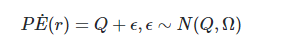

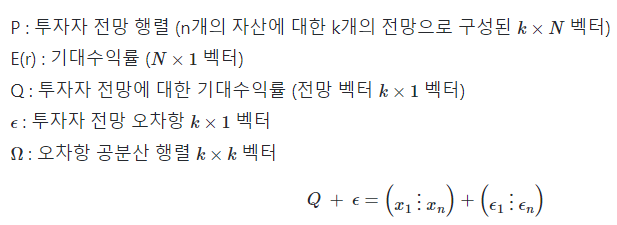

투자자산의 기대수익을 말할 때는 공분산 행렬을 사용해 불확실성의 수준을 표시

투자자전망 행렬(P)와, 초과수익률 공분산(Σ), 위험조정상수( 화면 캡처 2022-07-20 232523.png)를 사용해 오차항 공분산 행렬(화면 캡처 2022-07-20 232607.png ) 을 다음과 같이 계산한다.


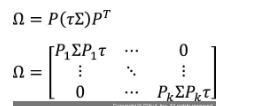

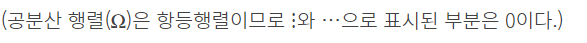

(화면 캡처 2022-07-20 232607.png) 값은 전망치에 대한 불확실성의 정도를 수치화 한것이며 전망에 대한 분산으로 표현됨

전망에 대한 신뢰가 낮으면 분산의 정도가 높고, 신뢰가 높으면 분산의 정도가 낮다.

블랙-리터만 기대수익률을 계산하기 위해 균형기대수익률과 투자자 전망을 결합

결합할 때는 베이지안 방법 사용

**#투자자의 전망하에 기대수익률을 업데이트하면 다음과 같다.**

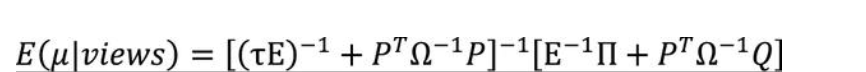

**#투자자의 전망이 확실해 오차가 없다면, 즉 화면 캡처 2022-07-20 232607.png = 0이므로 다음과 같이 할 수 있다.**

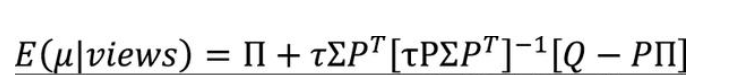

# 5.6 블랙 -리터만 공식

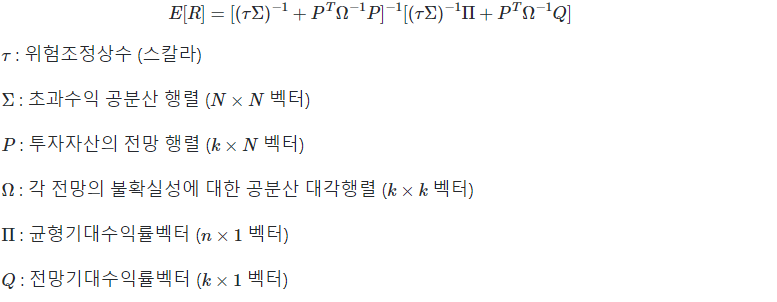

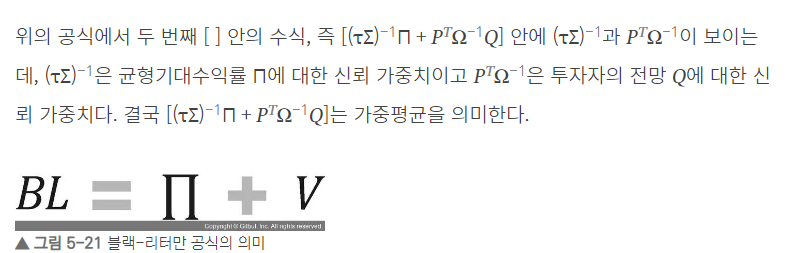

**결국, 블랙-리터만 식을 변형하면 시장에 내재된 균형기대수익률( 화면 캡처 2022-07-19 224410.png ) 과 투자 전망에 의한 수익률(V , n x 1 행렬)로 나뉜다.**

# 5.7 위험 조정상수(화면 캡처 2022-07-20 232523.png)


1. 실제 데이터와 표본 데이터 간에 차이가 생기는데 균형기대수익률을 추정했지만, 기대수익률 분산값은 과거 데이터를 사용하므로 이를 조정해줘야 한다.

  == 이러한 차이를 보정하는 장치가 위험조정상수화면 캡처 2022-07-20 232523.png)

2. 표본 데이터 개수가 아무리 많아도 전체 데이터 개수보다 작기 때문에 표본 표준편차는 늘 전체 표준편차보다 크다. 

==위험조정상수는(화면 캡처 2022-07-20 232523.png) 는 이를 줄여서 보정해주는 역할을 함.

---
보통 화면 캡처 2022-07-20 232523.png) ) 은 0과 1 사이인데, 화면 캡처 2022-07-20 232523.png) 값이 높으면 기대수익률에 대한 확신이 낮고, 화면 캡처 2022-07-20 232523.png) 값이 낮으면 확신이 높다고 본다.

화면 캡처 2022-07-20 232523.png) 은 초기에 0.01 ~ 0.05 사이에 임의적으로 결정된 값을 사용

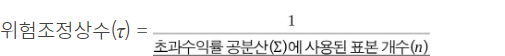



#5.8 세 가지 자산을 가정한 예시 

간단한 예시를 살펴보면 이론을 실무로 옮기는데 도움이 되었다.

앞서 설명한 수식의 내용보다 예시를 통해 전반적인 계산과정을 훑어보는 것이 도움이 되었다.

---
1.대형주, 소형주 , 중형주로 구성된 포트포리오 구성

2.2019년 9월부터 2020년 12월 사이의 월간 시장포트폴리오 수익률은 rBM

3.2020년 12월 말 시가총액을 세 개 종목의 시가총액 합계로 나눠서 포트폴리오의 투자 비중(Wmkt)으로 삼기로 한다.

4.무위험수익률(rf)은 국고채 3년물을 사용한다고 한다.

---
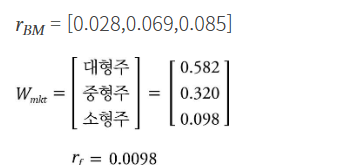

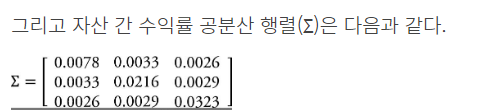



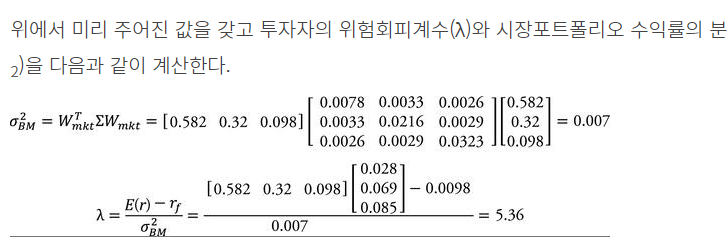

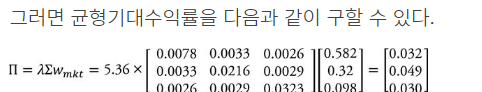

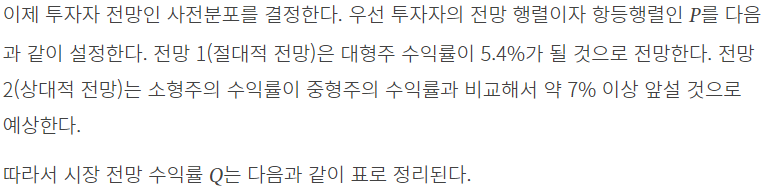

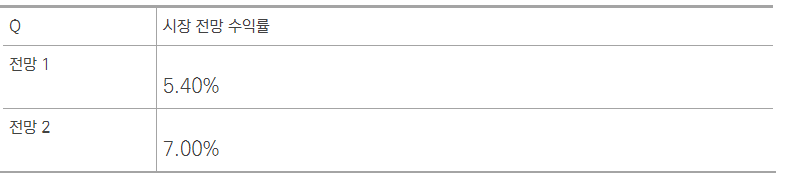

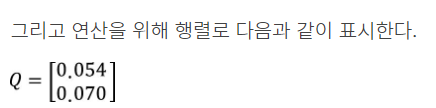

전망 1은 절대적 전망으로 대형주, 중형주, 소형주에 대한 각 전망의 합계는 1 이어야 한다.

대형주 외에 중형주, 소형주에 대한 전망은 없으므로 전망 값은 0

대형주에 대한 전망이 있고 합계가 1이어야 하므로 절대적 전망은 [1,0,0]

---
전망 2는 각 자산에 대한 전망 값의 합계가 0이어야 한다.

그리고 상대적 전망으로 성과가 나올 것으로 예상되면 1, 미달되면 -1, 전망이 없다면 0이다.

대형주에 대한 전망은 없으므로 0, 중형주는 소형주에 비해 못할 것으로 전망되므로 -1, 소형주는 중형주보다 나을 것으로 전망되므로 1이다.

결국, 상대적 전망은[0,-1,1]

---



따라서, 시장 전망 행렬 P는 다음과 같다.

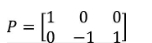

위험조정상수는 1/n 인데, 이때 n은 공분산을 산출할 때 사용한 데이터의 개수이다.

2019년 9월부터 2020년 12월까지 16개월 간의 자료를 사용하므로 

화면 캡처 2022-07-20 232523.png = 1/n = 1/16 = 0.0625로 설정한다.

투자자 전망의 불확실성, 분산(즉 오차항 공분산 행렬)은 다음과 같이 계산한다.

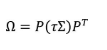

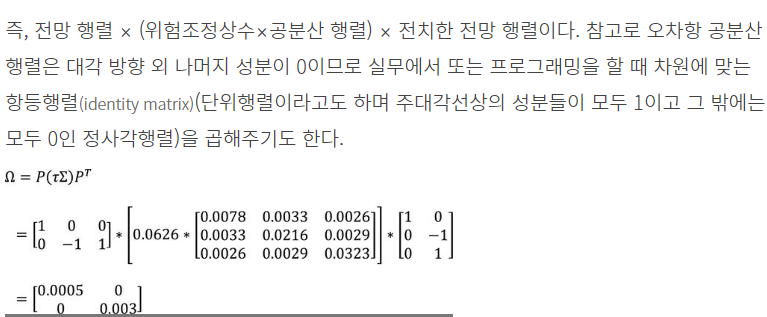

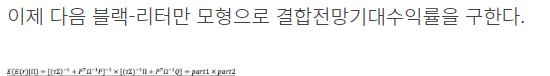

수식이 길고, 계산이 복잡하여 수식을 이등분하여 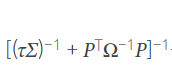 을 계산하였다.

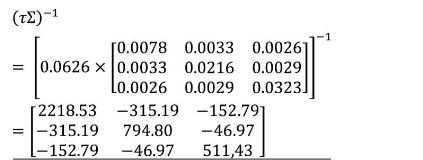

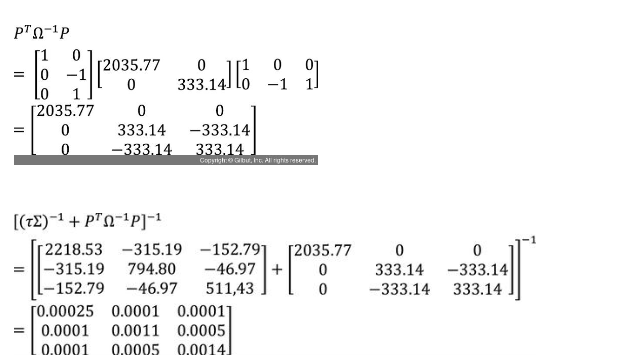



수식의 나머지 절반인 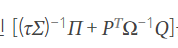 를 계산하였다.

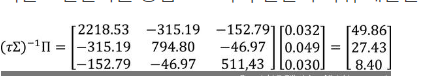

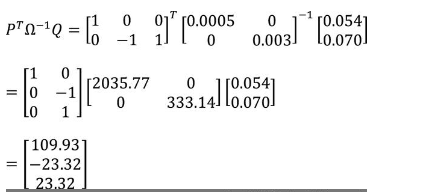

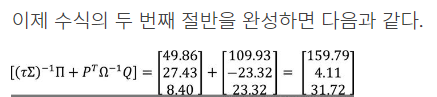

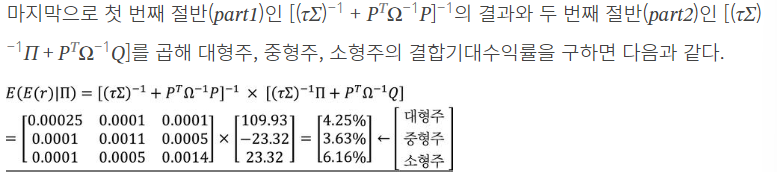

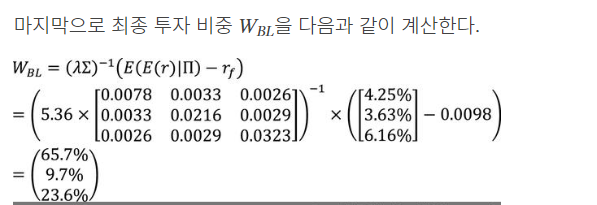

# 5.9 블랙-리터만 모델 최적화 !

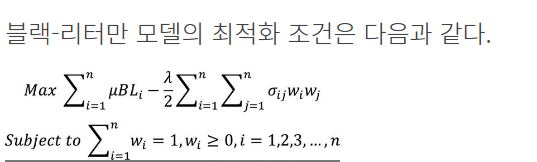

---
위의 식을 통해 각각의 자산에 대한 투자 비중(Wi)을 구할 수 있다.

블랙-리터만 모델은 각 자산의 시가총액을 변수로 입력해 자산별 적정수익률을 산정하는 방식, =이를 역최적화 

최적화를 함수로 분리하고, 두 개의 최적화함수(SolveWeight와 SolveFrontier)안에 목적함수(obj)를 포함시킨 것이다.

---







다음은 무위험수익률, 수익률, 공분산으로 샤프비율을 최대로 하는 접점포트폴리오 최적화 수행
